In [47]:
#! /usr/bin/python

import json
from pprint import pprint

import pandas as pd

from pandas import json_normalize

json_file = 'SimulationLogs/simulation_2023_4_14_9_6_42.txt'
json_file = 'SimulationLogs/simulation_2023_4_14_9_6_42.txt'

json_file = "SimulationLogs\simulation_2023_4_14_11_40_38_READABLE.txt"
json_file = "SimulationLogs\simulation_2023_4_23_9_24_35_READABLE.txt"



# json_file = "analysis/simulation_2023_4_20_16_23_2_READABLE.txt"
# json_file = "analysis/log_human_readable.txt"


json_data = []

zebra_data = ""
with open(json_file,'r') as f:
    data = {}
    for line in f:
        # pprint(line)
        # pprint(line.split("\n"))
        if("Zebra" in line):
            zebra_data = line.split(":")[1].split(" ")[0]
            continue
            
#             zebra_data.append

        if(line == '\n'):
            json_data.append(data)
            # print(data)

            data = {}
            continue

        data["zebra"] =zebra_data 
        try:
        
            key2 = line.split(":")[1].split(",")[1]
            val2 = line.split(":")[2].split("\n")[0]
            data[key2] = val2
        except:
            pass
        
        key = line.split(":")[0]
        try:
            key = key.split("--")[1].split(" ")[1]
        except:
            pass
        
        try:
            key = key.split(",")[0]
        except:
            pass
        
        try:
            key = key.split("\"")[1]
        except:
            pass

#         print(key)
        try:
            if("heart" in line.split(":")[1].split("\n")[0] ):
                data[key] =  line.split(":")[1].split("\n")[0].split(",")[0]
#                 data["heart_rate"]= line.split(":")[1].split("\n")[0].split(",")[0]
                
            elif("Timestamp" in key):
                data["timestamp"]= line.split(":")[1].split("\n")[0].split(" ")[1].split(".")[0]
            else:
                data[key]= line.split(":")[1].split("\n")[0].split(" ")[1]
            
            
        except Exception as e:
            print(e)
#         print(data)


# pprint(json_data)


temp=None
new_json_data = []
for data in json_data:

    if "timestamp" in [*data]:
        temp = data
        continue
    else:
        try:
            # print(data.items())
            # z1 = dict(data.items() + temp.items())
            # print(z1.items())

            # data.update(temp)

            new_dat =dict(data,**temp)

#             new_dat["oxygen_saturation"] = new_dat["oxygen_saturation"].split(",")[0]
#             print(new_dat["oxygen_saturation"])

            new_json_data.append(dict(data,**temp))

        except Exception as e:
            print(e)

        
# pprint(new_json_data)

df = pd.DataFrame(new_json_data)
# df = df.drop(' "heart_rate"', axis=1)
df = df.rename(columns = {' "heart_rate"':'heart_rate'})
print(df.columns)
# df.head(20)
df = df.dropna()
df

dict() argument after ** must be a mapping, not NoneType
Index(['zebra', 'temperature', 'heart_rate', 'oxygen_saturation', 'location',
       'timestamp'],
      dtype='object')


,zebra,temperature,heart_rate,oxygen_saturation,location,timestamp
0,c73303,96.24698,60,0.98,"[-414.5557,323.1238]",1736
1,c73303,96.24641,60,0.98,"[-413.7211,322.5698]",1737
2,c73303,96.24586,60,0.98,"[-412.8832,322.0136]",1738
3,c73303,96.2453,60,0.98,"[-412.0487,321.4597]",1739
4,c73303,96.24474,60,0.98,"[-411.2107,320.9034]",1740
...,...,...,...,...,...,...
51084,075283,91.30383,200,0.96,"[-212.6811,-297.4315]",9170
51085,075283,91.30312,200,0.96,"[-212.6811,-297.4315]",9171
51086,075283,91.3024,200,0.96,"[-212.6811,-297.4315]",9172
51087,075283,91.30168,200,0.96,"[-212.6811,-297.4315]",9173


In [48]:
# we prune the data to contain all zebras 
df = df.loc[df['timestamp']>"2000"]

df

,zebra,temperature,heart_rate,oxygen_saturation,location,timestamp
264,c73303,96.0976,60,0.98,"[-257.8968,225.6552]",2001
265,c73303,96.09702,60,0.98,"[-257.8968,225.6552]",2002
266,c73303,96.09647,60,0.98,"[-257.8968,225.6552]",2003
267,c73303,96.09589,60,0.98,"[-257.8947,225.6575]",2004
268,c73303,96.09532,60,0.98,"[-257.8903,225.6624]",2005
...,...,...,...,...,...,...
51084,075283,91.30383,200,0.96,"[-212.6811,-297.4315]",9170
51085,075283,91.30312,200,0.96,"[-212.6811,-297.4315]",9171
51086,075283,91.3024,200,0.96,"[-212.6811,-297.4315]",9172
51087,075283,91.30168,200,0.96,"[-212.6811,-297.4315]",9173


In [49]:
import matplotlib.pyplot as plt
def get_x_y_positions(df):
    locations = df["location"].values.tolist()
    x= []
    y= []
    for vals in locations:
        try:
            evalued = eval(vals)
            x.append(evalued[0])
            y.append(evalued[1])
        except:
            pass
    return x,y
def plot_location(df):
    # print(locations)
    x,y = get_x_y_positions(df)

    plt.scatter(x,y)
    
    return max(x), max(y)


In [50]:
total_zebras = df["zebra"].unique()
print(total_zebras)
print(len(total_zebras))

['c73303' 'f5687c' 'e69dfb' '3ce141' '881c9d' 'e6ef08' '075283']
7


## Health Analysis 

In [51]:
# print unique values of oxygen saturation
print(df["oxygen_saturation"].unique())

#healthy saturation values should be between 95-100%, 

# lets inspect the 99% case
# unhealthy_df = df.loc[~df['oxygen_saturation'].isin([' 0.98', ' 0.99', ' 0.96'])]
o2_unhealthy_df = df.loc[df['oxygen_saturation'] ==' 0.99' ]

o2_unhealthy_df

# we see that 99 percent oxygen saturaion has a low heart rate, will inspect that further

[' 0.98' ' 0.99' ' 0.96']


,zebra,temperature,heart_rate,oxygen_saturation,location,timestamp
3410,c73303,94.11411,40,0.99,"[241.5109,-112.3551]",5166
3411,c73303,94.11343,40,0.99,"[241.5109,-112.3551]",5167
3412,c73303,94.11276,40,0.99,"[241.5109,-112.3551]",5168
3413,c73303,94.11209,40,0.99,"[241.5109,-112.3551]",5169
7666,f5687c,96.08566,40,0.99,"[-15.72642,-185.178]",2022
...,...,...,...,...,...,...
44514,075283,95.76888,40,0.99,"[368.6206,-144.8779]",2560
44515,075283,95.76826,40,0.99,"[368.6206,-144.8779]",2561
44516,075283,95.76767,40,0.99,"[368.6206,-144.8779]",2562
44517,075283,95.76707,40,0.99,"[368.6206,-144.8779]",2563


In [52]:
# we see multiple zebras, lets get their unique ids
high_oxygen_case = o2_unhealthy_df["zebra"].unique().tolist()
print(high_oxygen_case)

['c73303', 'f5687c', 'e69dfb', '3ce141', 'e6ef08', '075283']


In [53]:
# print unique values of heart rate
print(df["heart_rate"].astype(int).unique())

#healthy heart rate values should be around 67, so looks like we are good here except some values indicating 40
# 200 could represent a zebra that might be running

# extract the 40 values
heart_unhealthy_df = df.loc[df['heart_rate'].astype(int)<60]
heart_unhealthy_df

# we see its a single zerbra thats unhealthy and we can track its location and id 


[ 60  40 200]


,zebra,temperature,heart_rate,oxygen_saturation,location,timestamp
3410,c73303,94.11411,40,0.99,"[241.5109,-112.3551]",5166
3411,c73303,94.11343,40,0.99,"[241.5109,-112.3551]",5167
3412,c73303,94.11276,40,0.99,"[241.5109,-112.3551]",5168
3413,c73303,94.11209,40,0.99,"[241.5109,-112.3551]",5169
7666,f5687c,96.08566,40,0.99,"[-15.72642,-185.178]",2022
...,...,...,...,...,...,...
44514,075283,95.76888,40,0.99,"[368.6206,-144.8779]",2560
44515,075283,95.76826,40,0.99,"[368.6206,-144.8779]",2561
44516,075283,95.76767,40,0.99,"[368.6206,-144.8779]",2562
44517,075283,95.76707,40,0.99,"[368.6206,-144.8779]",2563


In [54]:
# print unique values of temperature
print(df["temperature"].astype(float).unique()) # avoiding unique values as they very close and different

#healthy heart rate values should be around 67, so looks like we are good here except the one 40

# extract the temperatures above 91 values or less than 90
temp_unhealthy_df = df.loc[((df['temperature'].astype(float)<90) | (df['temperature'].astype(float)>100)) ]
temp_unhealthy_df

# almost all have similar and healthy body temperatures on an average


[96.0976  96.09702 96.09647 ... 91.3024  91.30168 91.30096]


,zebra,temperature,heart_rate,oxygen_saturation,location,timestamp


In [31]:
# # Enable interactive plot
# %matplotlib notebook

## Space nd movement

In [55]:
# plot all possible coordinates the zebras have been to
max_x, max_y = plot_location(df)
max_x, max_y

(492.9385, 422.1364)

In [60]:
# plot last timestamp positions

max_time = df['timestamp'].max()
plot_location(df.loc[df["timestamp"]==max_time])

total_possible_positions = max_x*max_y
total_positions_occupied = len(total_zebras)

space_occupied = total_positions_occupied/total_possible_positions
space_occupied

# in my opinion quite spacious

3.363972978927657e-05

In [62]:
# plots of all locations a zebra has been to

plot_location(df)


(492.9385, 422.1364)

In [58]:
# import geopy.distance
# print geopy.distance.geodesic(coords_1, coords_2).km
import numpy as np


def get_speed(direct):
    c_old = 0
    speed_c = []
    for c_val in x:
        speed_c.append(c_val-c_old)
        c_old = c_val
        
    return s
    
def get_speed(x,y):
    x_old = 0
    y_old = 0
    speed=[]
    for x_val, y_val in zip(x,y):
        speed_x = x_val-x_old
        speed_y = y_val-y_old
        speed.append((speed_x**2 + speed_y**2)**0.5)
        x_old = x_val
        y_old = y_val
        
#         print(" ")
#         print(x_val)
#         print(y_val)
#         print((speed_x**2 + speed_y**2)**0.5)
        
    speed[0]=0
    return speed
        
def plot_cum_speed( zebra = "c73303"):
#     zebra = "c73303"
    df_zebra = df.loc[df["zebra"]==zebra]
    x,y = get_x_y_positions(df_zebra)
    s = get_speed(x,y)
    plt.plot(np.cumsum(s))
    plt.show()
    
# plot_cum_speed()
# plot_cum_speed("f5687c")
# # # print(s)
# print(total_zebras)

for zebra in total_zebras:
    plot_cum_speed(zebra)
# plt.hist(s, cumulative=True, label='CDF',
#  histtype='step', alpha=0.8, color='k')
    

In [43]:
%matplotlib tk
import matplotlib.animation as animation
total_time_entries = df["timestamp"].unique()
# for time in total_time_entries:
#     new_df = df.loc[df["timestamp"]==time]
#     x,y = get_x_y_positions(new_df)
#     plt.scatter(x,y)
# #     plt.show()

fig,ax = plt.subplots()

def update(i):
#     print("here")
    ax.clear()
    ax.set_xlim([-500, 500])
    ax.set_ylim([-500, 500])
    new_df = df.loc[df["timestamp"]==total_time_entries[i]]
    x,y = get_x_y_positions(new_df)
    ax.scatter(x,y,)
#     c=next(colors))
    
ani = animation.FuncAnimation(fig, update, frames=len(total_time_entries), interval=0.1)
IPython.display.display(fig) 
# plt.show()
ani.save('scatter.gif', writer='pillow')

NameError: name 'IPython' is not defined

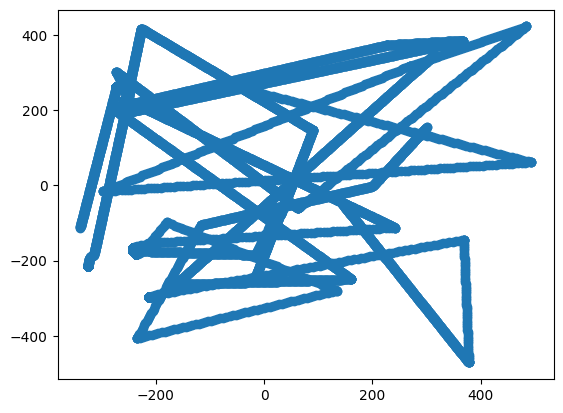

In [40]:
#Let us visualize the positions zebras have been in general


# import numpy as np
# from matplotlib import pyplot as plt

# locations = df["location"].values.tolist()
# # print(locations)
# x= []
# y= []
# for vals in locations:
#     try:
#         evalued = eval(vals)
#         x.append(evalued[0])
#         y.append(evalued[1])
#     except:
#         pass
    
# # plt.scatter(x,y)

plot_location(df)

# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation

# # x = np.arange(10)
# # y = np.random.random(10)
# size = np.random.randint(150, size=10)
# colors = np.random.choice(["r", "g", "b"], size=10)

# fig = plt.figure()
# plt.xlim(-400, 400)
# plt.ylim(-400, 400)
# graph = plt.scatter([], [])

# def animate(i):
#     print("here")
#     graph.set_offsets(np.vstack((x[:i+1], y[:i+1])).T)
#     graph.set_sizes(size[:i+1])
#     graph.set_facecolors(colors[:i+1])
# #     try:
# #         graph.set_data(x[:i+1],y[i+1])
# #     except:
# #         print("error")
#     return graph
# ani = FuncAnimation(fig, animate, interval=200, save_count=10)
# ani.save("animation.mp4")
# plt.show()

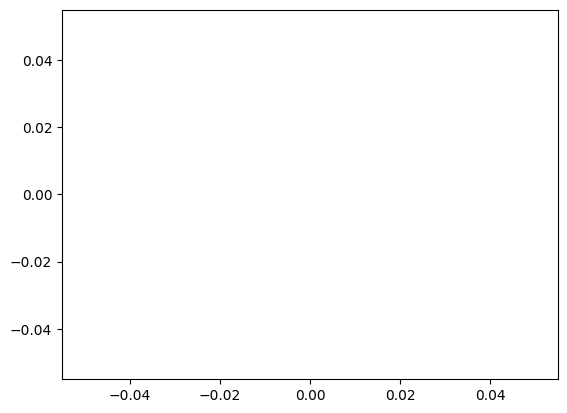

In [38]:
#Let us visualize at one point where all the zebras have been positions 

new_df = df.loc[df['timestamp']=="2000"]
locations = new_df["location"].values.tolist()
# new_df

x= []
y= []
for vals in locations:
    try:
        evalued = eval(vals)
        x.append(evalued[0])
        y.append(evalued[1])
    except:
        pass
    
plt.scatter(x,y)


In [ ]:
from matplotlib.animation import FuncAnimation
fig = plt.figure()
plt.xlim(-400, 400)
plt.ylim(-300, 500)
graph, = plt.plot([], [], 'o')

def animate(i):
    graph.set_data(x[:i+1], y[:i+1])
    return graph

ani = FuncAnimation(fig, animate, frames=10, interval=200)
plt.show()